## Load required modules

In [1]:
# External libraries
import numpy as np
import pandas as pd
import pygal
import math
import IPython
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import importlib
import svgutils 
from svgutils.compose import *
#import svgwrite

# Custom code
from fx_RNAseq import *
def findgene(genename):
    dPath = "~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/" #directory path
    fPath = "00_rodsVcones/rodVCones_raw.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist(genename):
    dPath = "~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/" #directory path
    fPath = "00_rodsVcones/rodVCones_raw.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

# def findgene(genename):
#     !head -1 ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/00_rodsVcones/rodVCones_raw.csv > ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/temp.txt
#     # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
#     !grep -w ^$genename ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/00_rodsVcones/rodVCones_raw.csv >> ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/temp.txt
#     gdf = pd.read_csv("~/Dropbox/LiLab/RNAseq/20190827_DESeq2/temp.txt")
    
#     return gdf

# def findgenelist(genename):
#     !head -1 ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/00_rodsVcones/rodVCones_raw.csv > ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/temp.txt
#     # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
#     !grep ^$genename ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/00_rodsVcones/rodVCones_raw.csv >> ~/Dropbox/LiLab/RNAseq/20190827_DESeq2/temp.txt
#     gdf = pd.read_csv("~/Dropbox/LiLab/RNAseq/20190827_DESeq2/temp.txt")
#     return gdf

def plotNReads():
    rdf = pd.read_csv("~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/nMappedReads.csv")
    h = rdf.iloc[:,1]
    h = h / 1e6
    n = np.arange(1,7) # Rods
    n = np.append(n, 6.5 + np.arange(1,6)) # UV
    n = np.append(n, 12 + np.arange(1,7)) # S
    n = np.append(n, 18.5 + np.arange(1,8)) # M
    n = np.append(n, 26 + np.arange(1,7)) # L
    return n, h

def plotBars(genename):
    gdf = findgene(genename)
    n = np.arange(1,7) # Rods
    n = np.append(n, 6.5 + np.arange(1,6)) # UV
    n = np.append(n, 12 + np.arange(1,7)) # S
    n = np.append(n, 18.5 + np.arange(1,8)) # M
    n = np.append(n, 26 + np.arange(1,7)) # L
    h_start = 7
    h_end = 37
    h = gdf.iloc[0,h_start:h_end]
    return n, h

def plotBars_list(genelist):
    n=[]
    h=[]
    for i,gene in enumerate(genelist, start=0):
        tempn, temph = plotBars(gene)
        n = np.append(n,tempn+(30*i))
        h = np.append(h,temph)
    return n, h

def svgreload():
    !osascript -e 'tell application "Google Chrome" to tell the active tab of second window to reload'

from pygal.style import Style
custom_style = Style(
    background = 'black',
    plot_background = '#111111',
    foreground = '#999999',
    foreground_strong = '#eeeeee',
    foreground_subtle = '#555555',
    opacity = '.8',
    opacity_hover = '.4',
    transition = '10ms',
    colors = ('#747474','#B540B7', '#4669F2','#04CD22','#CC2C2A'),
    label_font_size = 24,
    major_label_font_size = 24,
    title_font_size = 24,
    legend_font_size = 18
)

#photoreceptor Colors
pC = {
    'r' : '#747474',
    'u' : '#B540B7',
    's' : '#4669F2',
    'm' : '#04CD22',
    'l' : '#CC2C2A',
    'plt' : '',
}

pC['plt']=[
    pC['r'],pC['r'],pC['r'],pC['r'],pC['r'],pC['r'],
    pC['u'],pC['u'],pC['u'],pC['u'],pC['u'],
    pC['s'],pC['s'],pC['s'],pC['s'],pC['s'],pC['s'],
    pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],
    pC['l'],pC['l'],pC['l'],pC['l'],pC['l'],pC['l']
]

print('LOADED')

LOADED


In [2]:
# %cd ~/Dropbox/Presentations/RevealReboot/resources/20191002_RNAseq/
%cd ~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/genePlots/ForLaura/

/Users/angueyraaristjm/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/genePlots/ForLaura


***
# Index <a id='Index'>∮</a>
***
- [Plot Total Number of Reads](#nReads)
- [PCA Plots](#pcaPlots)
- [BarPlot: Opsins](#barOpsins)
- [BarPlot: Custom](#barCustom)
- [BarPlot: Many Genes](#barMany)
- [BarPlot_subPlotsAutomatic: Custom](#barManyAuto)
- [Heatmap: Opsins](#heatOpsins)
- [Heatmap: Custom](#heatCustom)
***

***
## Total number of reads<a id='nReads'>∮</a>
***
[Back to Index](#Index)

### pygal version (does not import well into Intaglio)
> hist = pygal.Histogram(x_title='',y_title='million of mapped reads',show_x_labels=False,title='',style=custom_style,legend_at_bottom=True,legend_at_bottom_columns=4,show_legend=False)  
> hist.add('Rod',[(11.27,0.2,0.8),(11.77,1.2,1.8),(9.4,2.2,2.8),(14.99,3.2,3.8),(9.75,4.2,4.8),(9.08,5.2,5.8),])  
> hist.add('UV',[(9.42,6.2,6.8),(6.52,7.2,7.8),(10.45,8.2,8.8),(9.46,9.2,9.8),(11.02,10.2,10.8)])  
> hist.add('S',[(9.23,11.2,11.8),(9.33,12.2,12.8),(9.37,13.2,13.8),(14.95,14.2,14.8),(12.85,15.2,15.8),(10.96,16.2,16.8)])  
> hist.add('M',[(10.40,18.2,18.8),(8.634,19.2,19.8),(7.36,20.2,20.8),(10.32,21.2,21.8),(8.33,22.2,22.8),(9.53,23.2,23.8),(9.526,17.2,17.8)])  
> hist.add('L',[(8.99,24.2,24.8),(10.50,25.2,25.8),(10.03,26.2,26.8),(11.08,27.2,27.8),(10.44,28.2,28.8),(10.72,29.2,29.8)])  
> hist.render_to_file('test.svg')

In [3]:
# dark background
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
         "axes.linewidth" : 3,
         "xtick.major.width" : 3,
         "ytick.major.width" : 3,
         "xtick.major.size" : 8,
         "ytick.major.size" : 8,
         "text.color" : "w"}
plt.rcParams.update(params)

In [ ]:
# white background
params = {"ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k",
         "axes.linewidth" : 3,
         "xtick.major.width" : 3,
         "ytick.major.width" : 3,
         "xtick.major.size" : 8,
         "ytick.major.size" : 8,
         "text.color" : "w"}
plt.rcParams.update(params)

In [ ]:
#pyplot version (Sep_2019)
plotname = ''
n,h = plotNReads()
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure_nReads(plotname, fH, ax, pH)
plt.tight_layout()
plt.savefig("{0}.svg".format('nReads'), transparent=True, format="svg")

In [ ]:
np.mean(h)

***
## pcaPlots<a id='pcaPlots'>∮</a>
***
[Back to Index](#Index)

In [ ]:
def formatFigure_pca(plotname, figH, axH, plotH):
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(fname=font_path, size=18)
    fontLabels = font_manager.FontProperties(fname=font_path, size=22)
    fontTitle = font_manager.FontProperties(fname=font_path, size=28)
    
    axH.ticklabel_format(style='sci',axis='y',scilimits=(0,2))
    axH.set_title(plotname, fontproperties=fontTitle)
    axH.spines['top'].set_visible(False)
    axH.spines['right'].set_visible(False)
    
    for label in (axH.get_xticklabels() + axH.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    axH.tick_params(axis = 'both', which = 'major', labelsize = 18)
    axH.yaxis.offsetText.set_fontsize(18)

In [ ]:
#pyplot version (Sep_2019)
plotname = 'PCA_RodsCones'
pc_df = pd.read_csv("~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_rodsVcones/pcaData.csv")
pc1 = pc_df.iloc[:,0]
pc2 = pc_df.iloc[:,1]
fH, ax = plt.subplots(figsize=[5,5])
pH = plt.scatter(pc1, pc2, color=pC['plt'])
formatFigure_pca(plotname, fH, ax, pH)
ax.set_xlabel('PC1 (var = 21%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
ax.set_ylabel('PC2 (var = 9%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
plt.xlim(-100,50)
plt.ylim(-60,60)
plt.tight_layout()
plt.savefig("{0}.svg".format(plotname), transparent=True, format="svg")

In [ ]:
#pyplot version (Sep_2019)
plotname = 'PCA_UVS_ML'
pc_df = pd.read_csv("~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_USvsLM/pcaData.csv")
pc1 = pc_df.iloc[:,0]
pc2 = pc_df.iloc[:,1]
fH, ax = plt.subplots(figsize=[5,5])
pH = plt.scatter(pc1, pc2, color=[
    pC['u'],pC['u'],pC['u'],pC['u'],pC['u'],
    pC['s'],pC['s'],pC['s'],pC['s'],pC['s'],pC['s'],
    pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],
    pC['l'],pC['l'],pC['l'],pC['l'],pC['l'],pC['l']
]
                )
formatFigure_pca(plotname, fH, ax, pH)
ax.set_xlabel('PC1 (var = 13%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
ax.set_ylabel('PC2 (var = 10%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
plt.xlim(-80,80)
plt.ylim(-60,60)
plt.tight_layout()
plt.savefig("{0}.svg".format(plotname), transparent=True, format="svg")

In [ ]:
#pyplot version (Sep_2019)
plotname = 'PCA_ML'
pc_df = pd.read_csv("~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_LvsM/pcaData.csv")
pc1 = pc_df.iloc[:,0]
pc2 = pc_df.iloc[:,1]
fH, ax = plt.subplots(figsize=[5,5])
pH = plt.scatter(pc1, pc2, color=[
    pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],pC['m'],
    pC['l'],pC['l'],pC['l'],pC['l'],pC['l'],pC['l']
]
                )
formatFigure_pca(plotname, fH, ax, pH)
ax.set_xlabel('PC1 (var = 23%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
ax.set_ylabel('PC2 (var = 10%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
plt.xlim(-80,80)
plt.ylim(-80,80)
plt.tight_layout()
plt.savefig("{0}.svg".format(plotname), transparent=True, format="svg")

In [ ]:
#pyplot version (Sep_2019)
plotname = 'PCA_U_S'
pc_df = pd.read_csv("~/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/00_UvsS/pcaData.csv")
pc1 = pc_df.iloc[:,0]
pc2 = pc_df.iloc[:,1]
fH, ax = plt.subplots(figsize=[5,5])
pH = plt.scatter(pc1, pc2, color=[
    pC['u'],pC['u'],pC['u'],pC['u'],pC['u'],
    pC['s'],pC['s'],pC['s'],pC['s'],pC['s'],pC['s'],
]
                )
formatFigure_pca(plotname, fH, ax, pH)
ax.set_xlabel('PC1 (var = 13%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
ax.set_ylabel('PC2 (var = 10%)', fontproperties=font_manager.FontProperties(fname='/System/Library/Fonts/Avenir.ttc', size=22))
plt.xlim(-100,100)
plt.ylim(-80,80)
plt.tight_layout()
plt.savefig("{0}.svg".format(plotname), transparent=True, format="svg")

In [ ]:
# US vs LM: PC1 = 13% and PC2 = 10%
# M vs L: PC1 = 23% and PC2 = 10%
# UV vs S: PC1 = 15% and PC2 = 13%

***
## barPlot: Opsins<a id='barOpsins'>∮</a>
***
[Back to Index](#Index)

In [ ]:
# from fx_RNAseq import *

In [ ]:
genename = 'opn1lw2'
n,h = plotBars(genename)
h = h / 1e6
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure_Opsins(genename, fH, ax, pH)
plt.savefig("{0}.svg".format(genename), transparent=True, format="svg")

In [ ]:
findgene('rho')

***
## barPlot: Custom Gene<a id='barCustom'>∮</a>
***
[Back to Index](#Index)

> Genes to pay attention to but still haven't given interesting results
> cdh (cadherins)
> protocadherins
> semaphorins
> plexins (plx)
> laminins (lamb) and integrins (itg)
> dystroglycan (dag), dystrophin (dmd), pikachurin
> neurexins
> cadm
> dscam and sidekicks (sdk)
> pappaa


In [ ]:
gdf = findgenelist('lrit')
gdf

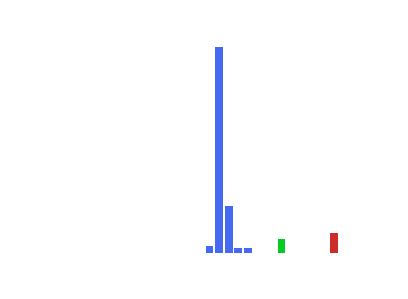

In [191]:
genename = 'prickle3'
genename = 'ncdn'
genename = 'prickle3'
# genename = 'grin1b'
# genename = 'cdhr1a'
# genename = 'lrit1a'
n,h = plotBars(genename)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure(genename, fH, ax, pH)
plt.savefig("{0}.svg".format(genename), transparent=True, format="svg")

***
## barPlot: Many Genes Layout<a id='barMany'>∮</a>
***
[Back to Index](#Index)

In [ ]:
cd '~/Dropbox/LiLab/RNAseq/genePlots/combos'

In [ ]:
genelist = ['gnat1','gnat2']
n, h = plotBars_list(genelist)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure_list(genelist, fH, ax, pH)
# plt.savefig("{0}.svg".format('gnat'), transparent=True, format="svg")

In [ ]:
genelist = ['rho','opn1sw1','opn1sw2','opn1mw1','opn1mw2','opn1mw3','opn1mw4','opn1lw1','opn1lw2']
n, h = plotBars_list(genelist)
fH, ax = plt.subplots(figsize=[6*len(genelist),4])
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=pC['plt'])
formatFigure_list(genelist, fH, ax, pH)
plt.xlim(0,len(genelist)*10)
# plt.savefig("{0}.svg".format('opn1'), transparent=True, format="svg")

***
## barPlot: Many Genes Layout Using Subplots (proper way)<a id='barManySubPlots'>∮</a>
***
[Back to Index](#Index)

In [46]:
shrink = 1#2/3

In [ ]:
genelist = ['gnat1','gnat2']
fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*shrink*len(genelist),4*shrink])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i]) 
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format('gnat'), transparent=True, format="svg")

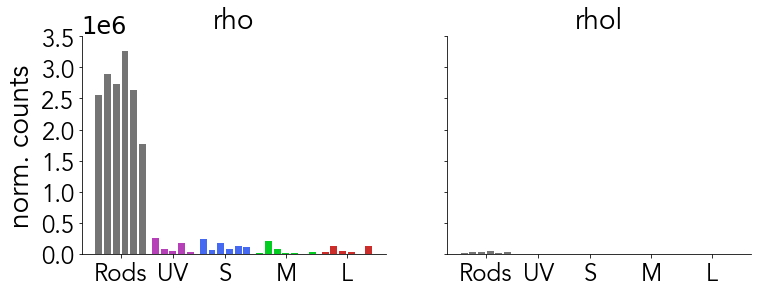

In [47]:
genelist = ['rho','rhol']

fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*shrink*len(genelist),4*shrink])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
        plt.ylim(0,3.5e6)
        axes[0].set_yticks(np.arange(0, 4.0e6, step=0.5e6))
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format('rho'), transparent=True, format="svg")

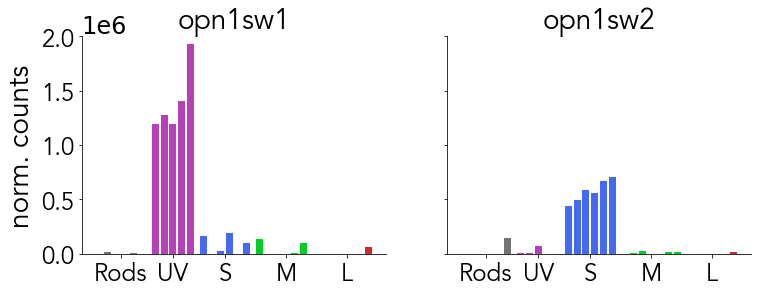

In [48]:
genelist = ['opn1sw1','opn1sw2']

fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*shrink*len(genelist),4*shrink])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
        plt.ylim(0,2e6)
        axes[0].set_yticks(np.arange(0, 2.5e6, step=0.5e6))
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format('opn1sw'), transparent=True, format="svg")

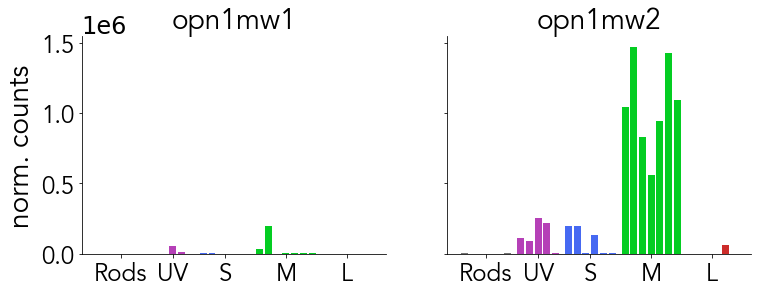

In [49]:
genelist = ['opn1mw1','opn1mw2']

fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*shrink*len(genelist),4*shrink])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format('opn1mwA'), transparent=True, format="svg")

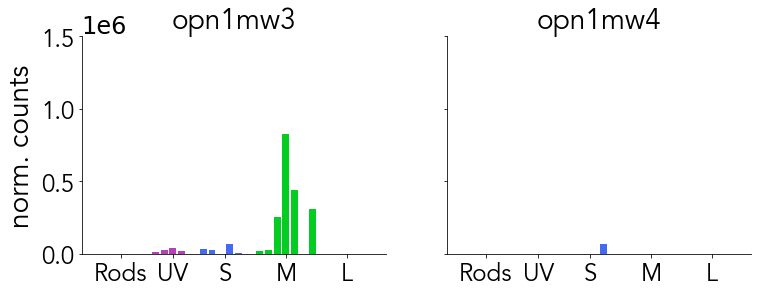

In [50]:
genelist = ['opn1mw3','opn1mw4']

fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*shrink*len(genelist),4*shrink])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
        plt.ylim(0,1.5e6)
        axes[0].set_yticks(np.arange(0, 2.0e6, step=0.5e6))
    else:
        formatFigure_right(g, fH, axes[i], pH)


plt.savefig("{0}.svg".format('opn1mwB'), transparent=True, format="svg")

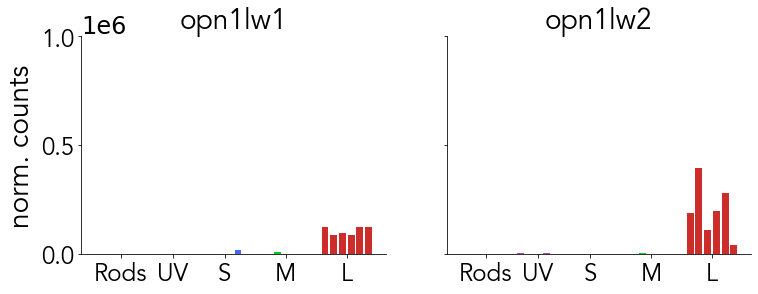

In [51]:
genelist = ['opn1lw1','opn1lw2']

fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*shrink*len(genelist),4*shrink])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
        plt.ylim(0,1e6)
        axes[0].set_yticks(np.arange(0, 1.5e6, step=0.5e6))
    else:
        formatFigure_right(g, fH, axes[i], pH)
#         axes[i].set_yticks(np.arange(0, 2.0e6, step=0.5e6))

plt.savefig("{0}.svg".format('opn1lw'), transparent=True, format="svg")

In [52]:
# Using svgutils to automatically tile these figures the right way
Figure("2400", "2000",
       SVG("rho.svg").move(0, 290*0),
       SVG("opn1sw.svg").move(0, 290*1),
       SVG("opn1mwA.svg").move(0, 290*2),
       SVG("opn1mwB.svg").move(0, 290*3),
       SVG("opn1lw.svg").move(0, 290*4)
        ).save("OpsinsAll.svg")
svgreload()

### Phototransduction

In [ ]:
gdf = findgenelist('gngt')
gdf = gdf.sort_values(by=['symbol'])
gdf

In [ ]:
genelist = ['saga','sagb','arr3a','arr3b']
plotName = 'arrestins'

genelist = ['gnat1','gnat2']
plotName = 'gnat'

genelist = ['gngt1','gngt2a','gngt2b']
plotName = 'gngt'

genelist = ['gnb1a','gnb1b','gnb3a','gnb3b','gnb4b','gnb5a','gnb5b']
plotName = 'gnb'

genelist = ['pde6a','pde6b','pde6c','pde6d','pde6ga','pde6gb','pde6c','pde6ha']
plotName = 'pde'

genelist = ['gucy1a1','gucy1b1','gucy1b2','gucy2c','gucy2d','gucy2f','gucy2g']
plotName = 'GC'

genelist = ['gucy2d','gucy2f']
plotName = 'GC_retinaSpecific'

genelist = ['guca1a','guca1b','guca1c','guca1d','guca1e','guca1g']
plotName = 'GCAP'

genelist = ['cnga1a','cnga1b','cnga3a','cnga3b','cnga4','cnga2a','cnga2b']
plotName = 'CNGalpha'

genelist = ['cnga1a','cnga1b','cnga3a','cnga3b']
plotName = 'CNGalpha_retinaSpecific'

genelist = ['cngb1a','cngb3.1','cngb3.2']
plotName = 'CNGbeta'


genelist = ['rgs9a','rgs9b','rgs9bp',
            'rgs3a','rgs6',
            'rgs11','rgs12a','rgs16','rgs20']
plotName = 'RGS'

genelist = ['grk1a','grk1b',
            'grk3',
            'grk4','grk5','grk5l',
            'grk6',
            'grk7a','grk7b']
plotName = 'GRK'

genelist = ['rcvrna','rcvrnb','rcvrn2','rcvrn3','ncalda','ncaldb']
plotName = 'rcvrn'



fH, axes = plt.subplots(1,len(genelist),sharey=True,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")

### Others

In [ ]:
gdf = findgenelist('cacn')
gdf = gdf.sort_values(by=['symbol'])
gdf

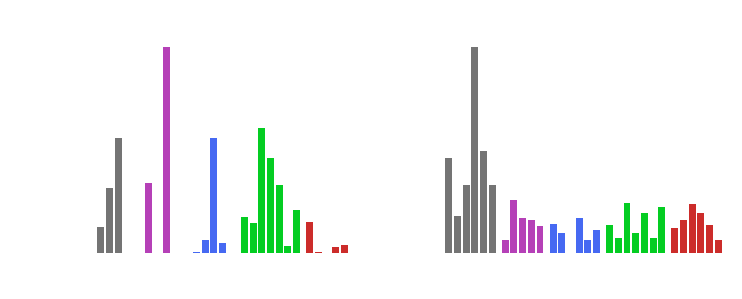

In [811]:
# genelist = ['ctbp1','ctbp2a']
# plotName = 'ctbp'

# genelist = ['cadm1a','cadm1b','cadm2a','cadm2b','cadm3','cadm4']
# plotName = 'cadm'

# genelist = ['tjp1a','tjp1b','tjp2a','tjp2b','tjp3']
# plotName = 'tjp'

# genelist = ['nrxn1a','nrxn1b','nrxn2a','nrxn2b','nrxn3a','nrxn3b',]
# plotName = 'nrxn'

# genelist = ['eml1','eml2','eml3']
# plotName = 'eml'

# genelist = ['elfn1b','elfn2a']
# plotName = 'elfn'

# genelist = ['cpne1','cpne2','cpne3','cpne4a','cpne4b','cpne5a','cpne5b','cpne7','cpne8','cpne9']
# plotName = 'cpne'

# genelist = ['tbx2a','tbx2b','tbxas1','tbx21']
# genelist = ['tbx2a','tbx2b']
# plotName = 'tbx2'

# genelist = ['chn1','chn2']
# plotName = 'chn'

# genelist = ['ncdn','ncdn']
# plotName = 'ncdn'

# genelist = ['sema7a','sema6a','sema6d','sema4ab','sema4ba','sema3fa','sema3fb']
# plotName = 'sema'

# genelist = ['cacna1aa','cacna1ab',
#             'cacna1da','cacna1db',
#             'cacna1fa','cacna1fb',
#             'cacna2d1a','cacna2d2a',
#             'cacna2d4a','cacna2d4b',
#             'cacna1sb',
#            ]
# plotName = 'CaV'

# genelist = ['stxbp1b','stxbp4','stxbp2','stxbp5a','stxbp5b','stxbp5l','stxbp3']
# genelist = ['stxbp1a','stxbp1b',
#             'stxbp2','stxbp3','stxbp4',
#             'stxbp5a','stxbp5b','stxbp5l',
#             'stxbp6','stxbp6l']
# plotName = 'stxBP'

# genelist = ['stx1a','stx1b','stx2a','stx2b','stx3a',
#             'stx4','stx5a','stx5al','stx6','stx7l',
#             'stx8','stx10','stx11a','stx11b.1','stx11b.2',
#             'stx12','stx12l','stx16','stx17','stx18']
# plotName = 'stx'

# genelist = ['prickle1a','prickle1b','prickle2a','prickle2b','prickle3',]
# plotName = 'prickle'

# genelist = ['pcdh15a','pcdh8','pcdh11']
# plotName = 'pdch'

# genelist = ['chn1','chn2']
# plotName = 'chn'

# genelist = ['ncdn','prickle3']
# plotName = 'ncdn'

# genelist = ['tbx2a','tbx2b']
# plotName = 'tbx2'

# genelist = ['lrit1a','lrit1b','lrit2','lrit3a','lrit3b']
# plotName = 'lrit'



# genelist = ['gpx1a','gpx1b','gpx4a','gpx4b']
# genelist = ['rgs9bp','RGS9BP']
# genelist = ['chchd1','chchd10']
# genelist = ['yipf6','yipf1']
# genelist = ['sema3fb','sema3fa','sema6d']
genelist = ['esama','esamb']

genelist = ['pcdh1gc6','tex264a']
plotName = 'test'

            
fH, axes = plt.subplots(1,len(genelist),sharey=False,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")

In [ ]:
gdf = findgenelist('opn1')
# gdf = gdf.sort_values(by=['symbol'])
# gdf = gdf.sort_values(by=['baseMean'], ascending=False)
# gdf['symbol']
gdf

### According to Neuhauss recoverin1a in enriched in rods and UV-cones

***
## heatMap: Opsins<a id='barManySubPlots'>∮</a>
***
[Back to Index](#Index)

Not sure this is helpful.  
Maybe use this to show differential expression by normalizing by mean expression in correct type

In [ ]:
gdf = findgenelist('opn1')
gdf2 = findgene('rho')
gdf2
gdf = gdf.append(gdf2)
gdf.index = range(len(gdf))
gdf

Opsins = ["Rhodopsin (rho)","UV-opsin (opn1sw1)", "S-opsin (opn1sw2)","M-opsin (opn1mw1)","M-opsin (opn1mw2)","M-opsin (opn1mw3)","M-opsin (opn1mw4)","L-opsin (opn1lw1)","L-opsin (opn1lw2)"]
Samples = ["","","R","","","",
           "","","U","","",
           "","","S","","","",
           "","","","M","","","",
           "","","L","","","",
          ]
Samples = [
          ]

data = gdf.iloc[0:9,7:37]
data = data.reindex([8,4,5,7,0,2,6,1,3])
data.index = range(len(data))
np.around(np.divide(data.values,1e6),2)
opsinData = np.divide(data.values,1e6)

# # log2 representation does not work well
# log2matrix = np.vectorize(log2)
# opsinData = log2matrix(opsinData)

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
         "axes.linewidth" : 2,
         "xtick.major.width" : 2,
         "ytick.major.width" : 2,
         "xtick.major.size" : 0,
         "ytick.major.size" : 0}
plt.rcParams.update(params)

plotName = "heatMap_opsins"
fig, ax = plt.subplots()

im, cbar = heatmap(opsinData, Opsins, Samples, ax=ax,
                   cmap="inferno", cbarlabel="counts per million")


# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

# fig.tight_layout()
plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")

***
## heatMap: Custom<a id='heatCustom'>∮</a>
***
[Back to Index](#Index)

In [898]:
plotName = "test"

# gdf = findgene('rho')
# gdf2 = findgenelist('opn1sw')
# gdf = gdf.append(gdf2)
# gdf2 = findgenelist('opn1mw')
# gdf2 = gdf2.sort_values(by=["symbol"])
# gdf = gdf.append(gdf2)
# gdf2 = findgenelist('opn1lw')
# gdf2 = gdf2.sort_values(by=["symbol"])
# gdf = gdf.append(gdf2)

# gdf.index = range(len(gdf))
# plotName = "heatMap_opsins"

# gdf = findgenelist('sema')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_sema"

# gdf = findgenelist('cdh')
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)
# plotName = "heatMap_cdh"

# gdf = findgenelist('eph')
# gdf = gdf.drop([1,14,15,16])
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_eph"


# gdf = findgenelist('efn')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_efn"

# gdf = findgenelist('pdgf')
# gdf = findgenelist('rgr')
# gdf = findgenelist('lmo')
# gdf.index = range(len(gdf))
# gdf.sort_values(by=["log2FoldChange"])


## genes in 2019 Papal, Swaroop: # igsf11, epha10, tuft1, prtg, lrfn2, vasn

# gdf = findgenelist('igsf')
# gdf = findgenelist('tuft')
# gdf = findgenelist('prtg')
# gdf = findgenelist('lrfn')
# gdf = findgenelist('vasn')

# gdf = findgenelist('rdh')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "rdhHeatMap"

# gdf = findgenelist('cyp2')
# gdf = findgenelist('cyb')

# gdf = findgenelist('sag')
# plotName = "heatMap_sag"

# gdf = findgenelist('dio')
# plotName = "heatMap_dio"

# gdf = findgenelist('lrrn')
# plotName = "heatMap_lrrn"
# gdf = findgenelist('dnmt')
# plotName = "heatMap_dnmt"
# gdf = findgenelist('tet')

# gdf = findgenelist('isl')
# gdf = gdf.drop([1])
# gdf = findgenelist('gj')
# plotName = "heatMap_gj"

# gdf = findgenelist('fgf')
# gdf = findgenelist('bmp')
# gdf = findgenelist('fzd')
# gdf = findgenelist('edar')
# gdf = findgenelist('axin')

# gdf = findgenelist('cadm') # cadm2a in S-Cones probably(?) and cadm3 in all photoreceptors (Hunter, JCN, 2011)
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_cadm"

# gdf = findgenelist('lrit') # lrit1b for rods and cones; lrit2 for cones
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_lrit"

# gdf = findgenelist('elfn') # not detected
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_elfn"

# gdf = findgenelist('tenm') # for RGCs in zebrafish (Antinucci, Cell Reports, 2013)

# gdf = findgenelist('foxo')

# gdf = findgenelist('sdk')

# gdf = findgenelist('crmp')



# Even More
# gdf = findgenelist('thr')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_thr"

# gdf = findgenelist('lingo')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_lingo"

# gdf = findgenelist('mitf')

# gdf = findgenelist('prickle')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_prickle"

# gdf = findgenelist('rdh')
# gdf = findgenelist('sdh')
# lingo, rx, mitf

# gdf = findgenelist('dag')
# can't find pikachurin: # gdf = findgenelist('egflam') gdf = findgenelist('si:dkeyp-100d11.2-001')

# gdf = findgenelist('kcn')
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# gdf = gdf.drop(np.arange(20,109))
# gdf

# gdf = findgenelist('kcnj')
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# gdf

# gdf = findgenelist('slc')
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# gdf = gdf.drop(np.arange(40,410))

# gdf = findgenelist('rcv')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_recoverin"

# gdf = findgenelist('sag')
# gdf = gdf.append(findgenelist('arrb'))
# gdf = gdf.append(findgenelist('arr3'))
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_arr"


# gdf = findgenelist('cng')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_cng"

# gdf = findgenelist('cnga')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_cnga"

# gdf = findgenelist('cngb')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_cngb"

# gdf = findgenelist('myo')
# gdf = gdf.sort_values(by=["symbol"])

# gdf = findgenelist('crx')
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# plotName = "heatMap_crx"


# gdf = findgenelist('neurod')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_neurod"

# gdf = findgenelist('ror')
# gdf = gdf.drop([5,6])
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_ror"


# gdf = findgenelist('nr')
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# gdf = gdf.drop(np.arange(5,76))
# plotName = "heatMap_nrl"


# gdf = findgenelist('pcdh')
# gdf = gdf.drop([1,15]) #highest ones that obscure others.
# plotName = "heatMap_pcdh_partial"

# gdf = findgenelist('hcn')
# gdf = gdf.sort_values(by=["symbol"])

# gdf = findgenelist('gabr')
# gdf = gdf.drop([0,2]) #highest ones that obscure others.
# gdf = gdf.sort_values(by=["symbol"])

# gdf = findgenelist('opn4')
# gdf = gdf.drop([1,2]) #highest ones that obscure others.
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# gdf = gdf.drop(np.arange(5,76))
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_ror"

# CSNB causes: Nyx, cacna1f, GPR179 (Kamermans, 2019)
# gdf = findgenelist('nyx') # bipolar cell -> not expressed in photoreceptors
# gdf = findgenelist('gpr1') # bipolar cell -> not expressed in photoreceptors
# gdf = findgenelist('cacna') # bipolar cell -> not expressed in photoreceptors


# For Karen Carleton

# gdf = findgenelist('rx')
# gdf = gdf.drop([2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19])
# gdf = gdf.sort_values(by=["symbol"])
# # gdf = gdf.drop([1])
# plotName = "heatMap_rx"

# gdf = findgenelist('tbx')
# gdf = gdf.drop([3,17])
# plotName = "heatMap_tbx"
# gdf = gdf.drop([1,2])

# gdf = findgenelist('tbx2')
# gdf = gdf.drop([0,3,4])
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_tbx2"

# gdf = findgenelist('six')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_six"

# gdf = findgenelist('lin')
# gdf = gdf.drop([1,3,4,5,10,11,13,16])
# plotName = "heatMap_lin"

# For Mark Hankins
# gdf = findgenelist('opn')
# gdf = gdf.sort_values(by=["symbol"])
# gdf = gdf.drop([1,4,24,0,3,23,5,11,2])

# gdf = findgenelist('rgr')
# gdf = findgenelist('lrit')

# gdf = findgenelist('ndrg') #potential target of tbx2

# from YiRong Peng's talk: ON SACs: slit2 and fezf1; OFF SACs: tenm3 and rnd1?; contactins; Foveal cones: vtn and cacna1f
# gdf = findgenelist('cacna2d2b')
# gdf = gdf.drop([0])
# gdf = gdf.sort_values(by=["symbol"])

# gdf = findgenelist('nrxn')
# gdf = gdf.sort_values(by=["symbol"])
# plotName = "heatMap_nrxn"


# gdf = findgenelist('frmpd')
# plotName = "heatMap_frmpd"

gdf = findgenelist('prrc')
# gdf = gdf.drop(np.arange(5,31))
# gdf = gdf.drop([0])
# gdf = gdf.sort_values(by=["symbol"])
gdf

,symbol,genename,baseMean,log2FoldChange,lfcSE,pvalue,padj,R1,R2,R3,...,M4,M5,M6,S7,L1,L2,L3,L4,L5,L6
0,prrc2c,proline-rich coiled-coil 2C,29.286774,-3.553126e-07,0.001443,0.020878,0.105130,0.00000,0.000000,5.133832,...,54.464534,0.000000,0.000000,0.000000,209.797591,0.000000,70.591278,13.276616,0.000000,20.397186
1,prrc2a,proline-rich coiled-coil 2A,452.719642,3.797351e-06,0.001443,0.191559,0.467294,753.85122,1297.636294,548.293224,...,725.286039,7.225716,796.506321,0.000000,468.327694,553.356254,770.086673,698.070508,477.903937,535.033884
2,prrc1,proline-rich coiled-coil 1,119.895295,5.315862e-07,0.001443,0.444048,0.695959,0.00000,1285.731374,253.611285,...,3.630969,273.544977,0.000000,277.692638,0.000000,286.984189,5.615215,17.469232,145.001374,198.480312


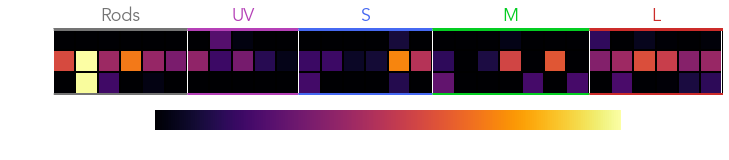

In [899]:
genenames = gdf['symbol'].values
samplenames = [] #skipping names to replace in intaglio
log2matrix = np.vectorize(log2)
# data = log2matrix(gdf.iloc[0:,7:15].values)
data = gdf.iloc[0:,7:37].values


fig, ax = plt.subplots(figsize=[12,12])
im, cbar = heatmap(data, genenames, samplenames, ax=ax,
                   cmap="inferno", cbarlabel="counts")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

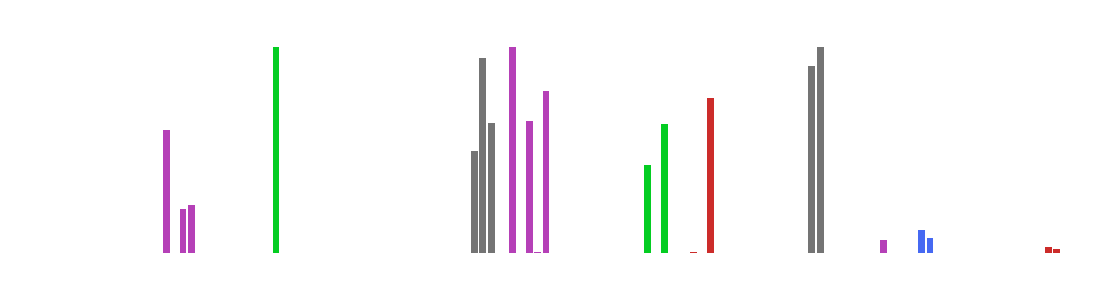

In [901]:
# genelist = ['gpx1a','gpx1b','gpx4a','gpx4b']
# genelist = ['rgs9bp','RGS9BP']
# genelist = ['chchd1','chchd10']
# genelist = ['yipf6','yipf1']
# genelist = ['sema3fb','sema3fa','sema6d']
genelist = ['esama','esamb']
genelist = ['il34','il7r']
genelist = ['cxxc4','cxxc1a']
genelist = ['mbd3b','mbd3a']
genelist = ['cdr2a','cdr2l']
genelist = ['coro6','coro2a','coro1ca']
genelist = ['auts2a','auts2b']
genelist = ['plxnb1a','plxna2']
genelist = ['cux1a','cux1b','cux2b']
genelist = ['arih1','arih2','arih1l']
genelist = ['crhbp','crhr2','crhr1']
genelist = ['chn1','chn2']

genelist = ['pcloa','pclob']
genelist = ['mtdha','mtdhb']
genelist = ['igsf9b','igsf21a','igsf21b']
genelist = ['rx3','lin9','igsf21b']
plotName = 'test'

            
fH, axes = plt.subplots(1,len(genelist),sharey=False,figsize=[6*len(genelist),4])
for i,g in enumerate(genelist,start=0):
    n, h = plotBars(g)
    plt.sca(axes[i])
    pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None,
                 color=pC['plt'])
    if  i == 0:
        formatFigure(g, fH, axes[i], pH)
    else:
        formatFigure_right(g, fH, axes[i], pH)
plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")

In [ ]:
np.size(data)

In [ ]:
360/30

In [ ]:
np.sqrt(2)*2

In [520]:
pwd

'/Users/angueyraaristjm/Documents/LiMolec/zfRNAseq/20190827/20190827_DESeq2/genePlots/ForLaura'

In [ ]:
pC['plt'][20]

In [ ]:
colors

### Trying to draw counts for single gene by wedges in a circle 
> Prob not worth it, difficult to interpret

In [ ]:
fig, ax = plt.subplots(figsize=[12,12])

n = 30;
wdg_theta = 360/30;

patches = []
circles = []

pM = matplotlib.patches.Wedge(0, np.mean(data[4,0:6]), wdg_theta * (0), (wdg_theta * (6)), edgecolor="none", color = pC['r'], alpha = 0.4)
patches.append(pM)

pM = matplotlib.patches.Wedge(0, np.mean(data[4,7:11]), wdg_theta * (6), (wdg_theta * (11)), edgecolor="none", color = pC['u'], alpha = 0.4)
patches.append(pM)

pM = matplotlib.patches.Wedge(0, np.mean(data[4,12:17]), wdg_theta * (11), (wdg_theta * (17)), edgecolor="none", color = pC['s'], alpha = 0.4)
patches.append(pM)

pM = matplotlib.patches.Wedge(0, np.mean(data[4,18:24]), wdg_theta * (17), (wdg_theta * (24)), edgecolor="none", color = pC['m'], alpha = 0.4)
patches.append(pM)

pM = matplotlib.patches.Wedge(0, np.mean(data[4,25:30]), wdg_theta * (24), (wdg_theta * (30)), edgecolor="none", color = pC['l'], alpha = 0.4)
patches.append(pM)

for i in range(n):
    p = matplotlib.patches.Wedge(0, data[4,i], wdg_theta * (i), (wdg_theta * (i+1)) -2, edgecolor="none", color = pC['plt'][i], alpha = 0.4)
    patches.append(p)


                              
                              
for i in [.25,.5,.75,1]:
    c = matplotlib.patches.Circle((0,0), np.max(data[4,:])*i, edgecolor = '#000000', facecolor='none', alpha=0.99)
    circles.append(c)

plt.xlim(-np.max(data[4,:])*1, np.max(data[4,:])*1)
plt.ylim(-np.max(data[4,:])*1, np.max(data[4,:])*1)


circleColl = matplotlib.collections.PatchCollection(circles, match_original=True);
ax.add_collection(circleColl)

patchColl = matplotlib.collections.PatchCollection(patches, match_original=True);
ax.add_collection(patchColl)


In [ ]:
pC

In [ ]:
np.max(data[4,i])

In [ ]:
data[4,i]

In [ ]:
range(0,4)

In [ ]:
range?